In [1]:
import pandas as pd
import numpy as np
from pool.error_analysis import VisionErrorAnalysis, DebugErrorAnalysis

ea=VisionErrorAnalysis()
dea=DebugErrorAnalysis()
data = pd.read_csv('./results/error_data_0.25_mm.csv', sep=',',decimal='.')
data=data.dropna()     #drop all rows that have any NaN values
data.head()

,real_point_id,C_x,C_y,T_x,T_y,estimated_point_id,C_estimated_x,C_estimated_y,T_estimated_x,T_estimated_y,...,X_estimated_y,slope_X1T,intercept_X1T,slope_X2T,intercept_X2T,X_calculated_x,X_calculated_y,Q_x,Q_y,delta
1,0.0,545.611148,83.072523,466.162412,190.911561,0.0,545.209231,83.352153,466.202124,190.430945,...,152.434417,0.361982,22.169278,1.320386,-424.602807,466.257762,152.911680,465.422845,485.650140,3.211885
2,0.0,545.611148,83.072523,466.162412,190.911561,0.0,545.209231,83.352153,466.202124,190.430945,...,168.848535,0.361982,22.169278,1.320386,-424.602807,497.448100,169.342932,38.528988,485.725804,0.144176
4,0.0,545.611148,83.072523,466.162412,190.911561,1.0,545.738070,83.030272,466.360766,191.091857,...,153.095628,0.361982,22.169278,1.320386,-424.602807,467.013136,152.921085,459.564061,485.571588,2.647425
5,0.0,545.611148,83.072523,466.162412,190.911561,1.0,545.738070,83.030272,466.360766,191.091857,...,169.547639,0.361982,22.169278,1.320386,-424.602807,497.572600,169.524647,36.820712,483.246447,2.866707
6,0.0,545.611148,83.072523,466.162412,190.911561,2.0,545.975872,82.791069,466.407751,190.819526,...,203.569411,0.361982,22.169278,1.320386,-424.602807,502.495718,202.042187,31.539068,57.765677,20.567596


### Check a specific configuration

Each row of the dataset represents the resut a random shot with an error due to the vision system

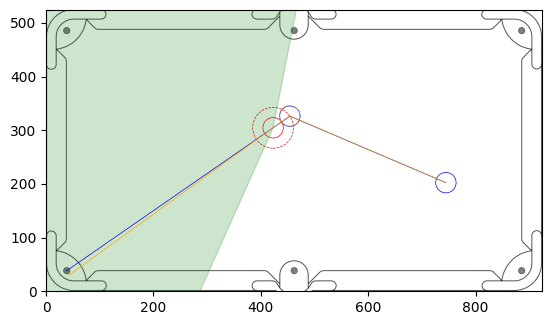

In [2]:
import matplotlib.pyplot as plt

real_point_id=1234
estimated_point_id=10 
fig, ax = plt.subplots()
ax.set_xlim((0, dea.pool_table_size[0]))
ax.set_ylim((0, dea.pool_table_size[1]))

sub_data=data[(data['real_point_id']==real_point_id)]
rows=sub_data.to_dict('records')
ax=dea.draw_pool_table_with_pockets(ax)
# we read from first row of sub_data, since the following rows will be the same:
row=rows[estimated_point_id]
ax=dea.draw_ideal_configuration(ax,row)
ax=dea.draw_region_of_interest(ax,row)
ax=dea.draw_real_configuration(ax,row)
ax.plot()  
plt.show()

### Dificulty of the shot

We divide our shots in 3 categories depending on the angle: the closest the angle is to 180 degrees, the better


In [3]:
data['cut_angle']=np.degrees(data['alpha']+data['beta'])
data.loc[(data['cut_angle']<30) & (data['cut_angle']> 0), 'difficulty_category'] = 1
data.loc[(data['cut_angle']<60) & (data['cut_angle']> 30), 'difficulty_category'] = 2
data.loc[(data['cut_angle']<90) & (data['cut_angle']> 60), 'difficulty_category'] = 3

### Visualization of data

Scatter plots of some varaible vs delta

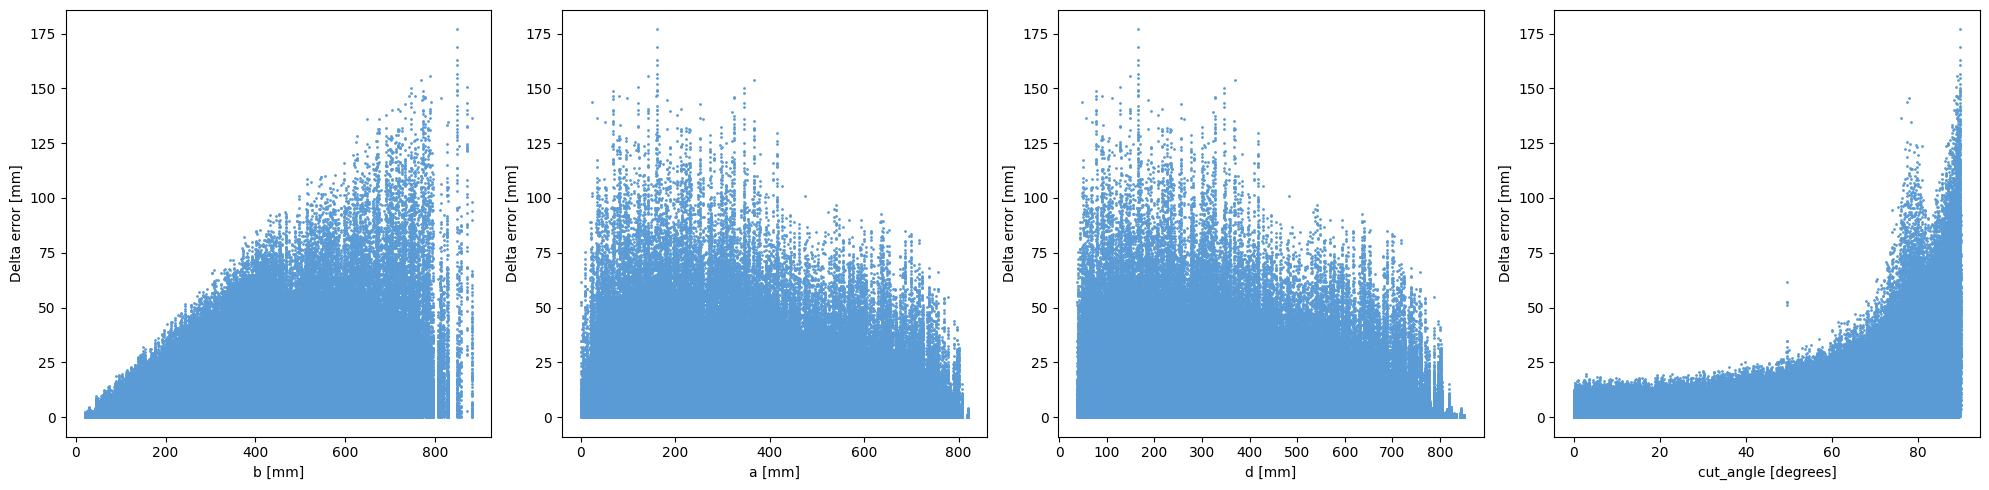

In [4]:
import numpy as np
import matplotlib.pyplot as plt

y = data['delta'].values
x=['b','a','d','cut_angle']
x_label_names=['b [mm]','a [mm]','d [mm]','cut_angle [degrees]']

fig = plt.figure(1,figsize=(20, 5))

columns = 4
rows = 1

for i,col_name,col_label_name in zip(range(1, columns*rows+1),x,x_label_names):

    x=data[col_name].values
    fig.add_subplot(rows, columns, i)
    plt.scatter(x, y, color=(91/255,155/255,213/255), s=1)
    plt.xlabel(col_label_name)
    plt.ylabel('Delta error [mm]')

plt.tight_layout()
plt.show()

Histograms of delta and its categories

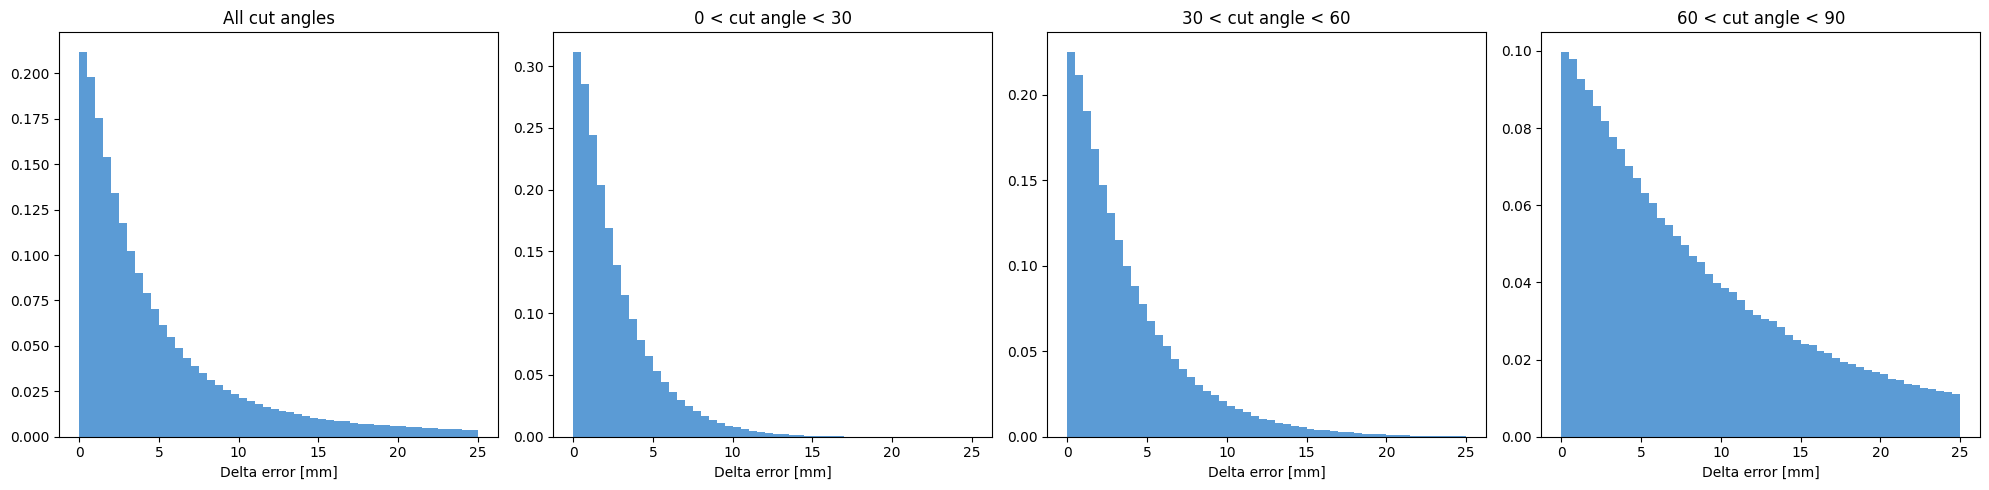

In [5]:
import numpy as np
import matplotlib.pyplot as plt

deltas=data['delta'].values
deltas_category1=data[data['difficulty_category']==1]['delta'].values
deltas_category2=data[data['difficulty_category']==2]['delta'].values
deltas_category3=data[data['difficulty_category']==3]['delta'].values
list_deltas=[deltas,deltas_category1,deltas_category2,deltas_category3]

fig = plt.figure(1,figsize=(20, 5))

columns = 4
rows = 1

for category,i,delta_type in zip(['All cut angles', '0 < cut angle < 30', '30 < cut angle < 60', '60 < cut angle < 90'],range(1, columns*rows+1),list_deltas):

    fig.add_subplot(rows, columns, i)
    plt.title(category)
    plt.hist(delta_type, bins=50,range=[0, 25], density=True, color=(91/255,155/255,213/255))
    plt.xlabel('Delta error [mm]')

plt.tight_layout()
plt.show()


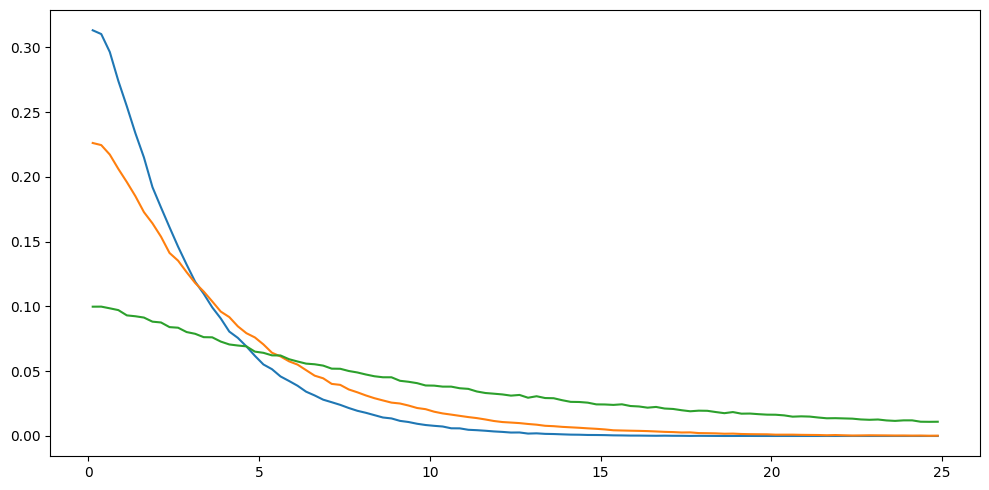

In [6]:
fig = plt.figure(1,figsize=(10, 5))

n,x=np.histogram(deltas_category1, bins = 100,range=[0, 25],density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges

n,x=np.histogram(deltas_category2, bins = 100,range=[0, 25],density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges

n,x=np.histogram(deltas_category3, bins = 100,range=[0, 25],density=True)
bin_centers = 0.5*(x[1:]+x[:-1])
plt.plot(bin_centers,n) ## using bin_centers rather than edges

plt.tight_layout()
plt.show()


### Probability of getting an error below a certain threshold

probability of error below 10mm:  0.860617529472765


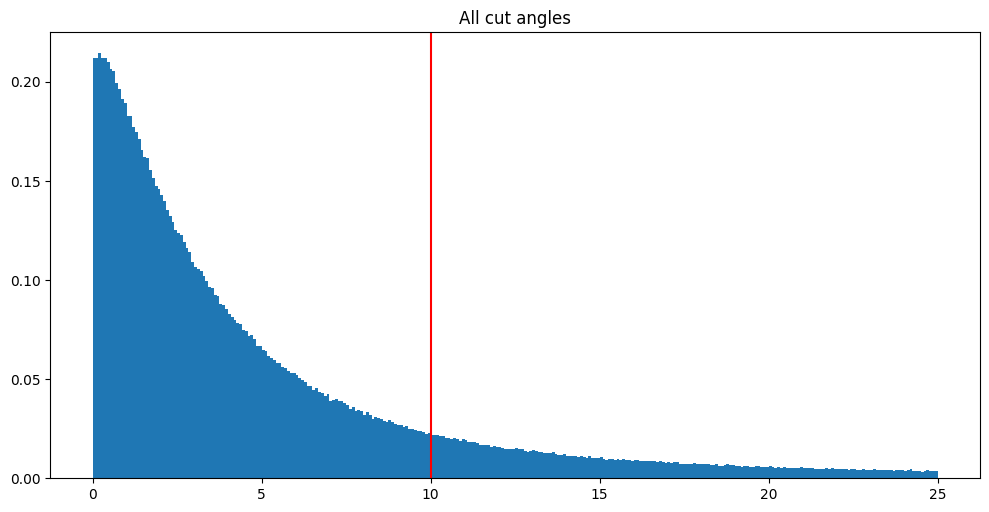

probability of error below 10mm:  0.9823087036550094


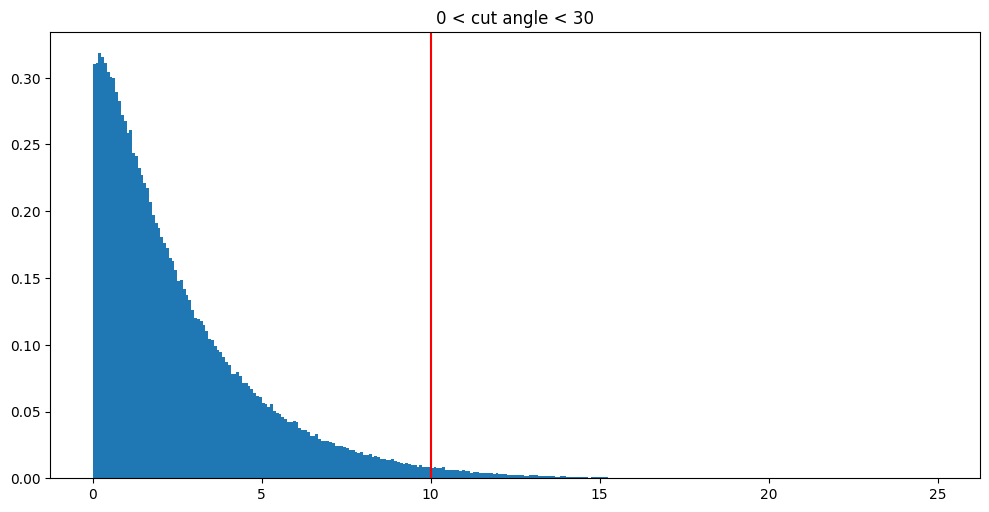

probability of error below 10mm:  0.9271569369240589


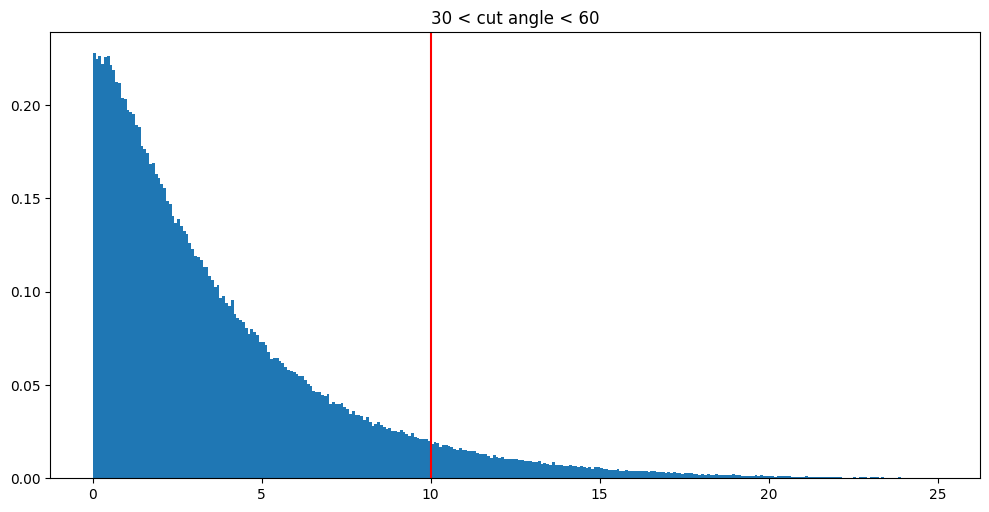

probability of error below 10mm:  0.6710540952351388


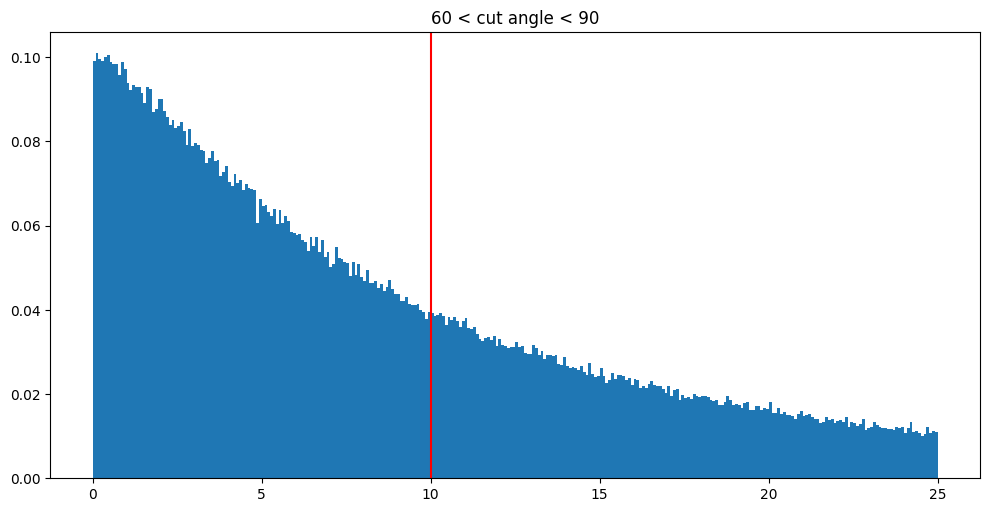

In [7]:
threshold=10
num_bins=300

for category,deltas_category in zip(['All cut angles', '0 < cut angle < 30', '30 < cut angle < 60', '60 < cut angle < 90'], [deltas,deltas_category1,deltas_category2,deltas_category3]):
    arr_pdf,arr_bins=np.histogram(deltas_category, bins = num_bins,range=[0, 25],density=True)

    #in order to match dimensions of bins and pdf arrays we get rid of last bins element
    arr_bins_cropped=arr_bins[:-1]
    arr_bins_thresholded=arr_bins_cropped[arr_bins_cropped<threshold]

    #in order to have the same dimension between _pdf and np.diff(_bins), _bins need to have one 
    #more element than _pdf (i.e., _pdf need to have one less element than _bins)
    arr_pdf_thresholded=arr_pdf[arr_bins_cropped<threshold][:-1]
    area=np.sum(arr_pdf_thresholded* np.diff(arr_bins_thresholded))
    print(f'probability of error below {threshold}mm: ', area)

    #plot computed probability
    fig = plt.figure(1,figsize=(10, 5))
    plt.hist(deltas_category, bins = num_bins, range=[0, 25],density=True)
    plt.axvline(x=threshold, color='r')
    plt.tight_layout()
    plt.title(f'{category}')
    plt.show()
